Top Selling Products:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64
Revenue by Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64
Customer Distribution by Region:
 Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64
Customer Sign-ups Over Time:
 SignupDate
2022    64
2023    57
2024    79
dtype: int64
Monthly Sales Trend:
 TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


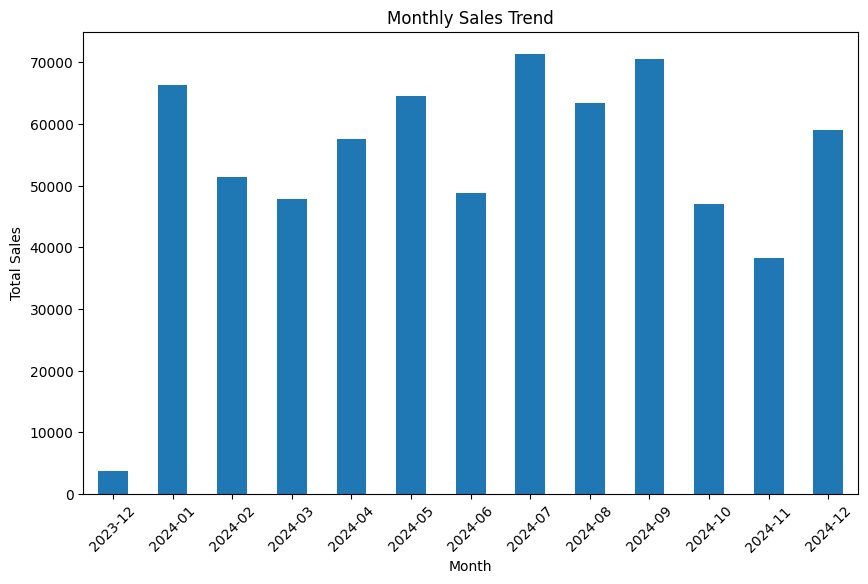

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
customers_df = pd.read_csv(r"C:\Users\harsh\Downloads\Customers.csv")
products_df = pd.read_csv(r"C:\Users\harsh\Downloads\Products.csv")
transactions_df = pd.read_csv(r"C:\Users\harsh\Downloads\Transactions (1).csv")

# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Merge datasets for analysis
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

# Insight 1: Top selling products by quantity
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
print("Top Selling Products:\n", top_products)

# Insight 2: Revenue by product category
revenue_by_category = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Category:\n", revenue_by_category)

# Insight 3: Most active customer regions
top_regions = merged_df['Region'].value_counts()
print("Customer Distribution by Region:\n", top_regions)

# Insight 4: Customer sign-ups over time
signup_trend = customers_df.groupby(customers_df['SignupDate'].dt.year).size()
print("Customer Sign-ups Over Time:\n", signup_trend)

# Insight 5: Monthly sales trend
monthly_sales = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("Monthly Sales Trend:\n", monthly_sales)

# Plotting insights
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()
